<a href="https://colab.research.google.com/github/douglaslpo/deep-learning/blob/main/RNA_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (10,8)

# Criar o dataset

In [ ]:
def get_curva_linear(x, w, b=0, noise_scale=0):
  return w*x + b + noise_scale*np.random.randn(x.shape[0])

In [ ]:
x = np.arange(-10, 30.1, 0.5)
Y = get_curva_linear(x, 1.8, 32, noise_scale=2.5)

In [ ]:
x.shape, Y.shape

((81,), (81,))

Text(0, 0.5, '°F')

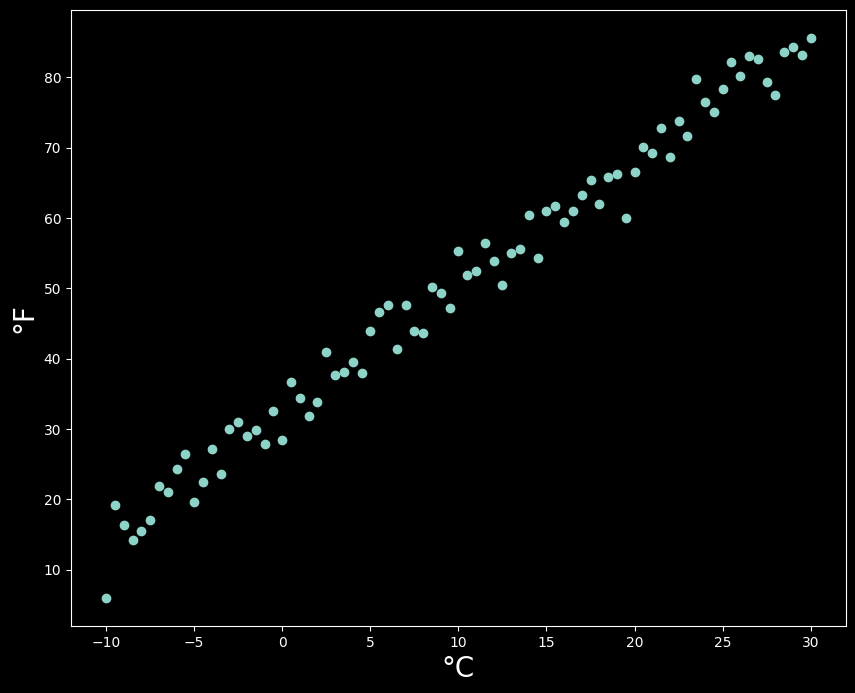

In [ ]:
plt.scatter(x,Y)
plt.xlabel('°C', fontsize = 20)
plt.ylabel('°F', fontsize = 20)

# Modelo

- Inicializar os pesos e bias
- Feedforward
- Calcular a perda
- Backpropagation

In [ ]:
# Inicializar

w = np.random.rand(1)
b = 0

In [ ]:
def forward(inputs, w, b):
  return w*inputs + b

In [ ]:
def mse(Y, y):
  return (Y-y)**2

In [ ]:
def backpropagation(inputs, outputs, targets, w, b, lr):
  dw = lr*(-2*inputs*(targets-outputs)).mean()
  db = lr*(-2*(targets-outputs)).mean()

  w -= dw
  b -= db

  return w,b


In [ ]:
def model_fit(inputs, target, w, b, epochs = 200, lr = 0.001):
  for epoch in range(epochs):

    outputs = forward(inputs, w, b)
    loss = np.mean(mse(target, outputs))
    w, b = backpropagation(inputs, outputs, target, w, b, lr)

    if(epoch+1) % (epochs/10) == 0:
      print(f'Epoch: [{(epoch+1)}/{epochs}] Loss: [{loss:.4f}]')

  return w, b

Para uma rede neural devemos fazer normalização!

In [ ]:
x = np.arange( -10,10,2)
Y = get_curva_linear(x, w = 1.8, b = 32)

In [ ]:
# Inicialização

w = np.random.randn(1)
b = np.zeros(1)

In [ ]:
w, b = model_fit(x, Y, w, b, epochs=360, lr=0.012)
print(f'w: {w[0]:.3f}, b: {b[0]:.3f}')

Epoch: [36/360] Loss: [191.9889]
Epoch: [72/360] Loss: [35.2317]
Epoch: [108/360] Loss: [6.4653]
Epoch: [144/360] Loss: [1.1864]
Epoch: [180/360] Loss: [0.2177]
Epoch: [216/360] Loss: [0.0400]
Epoch: [252/360] Loss: [0.0073]
Epoch: [288/360] Loss: [0.0013]
Epoch: [324/360] Loss: [0.0002]
Epoch: [360/360] Loss: [0.0000]
w: 1.800, b: 31.993


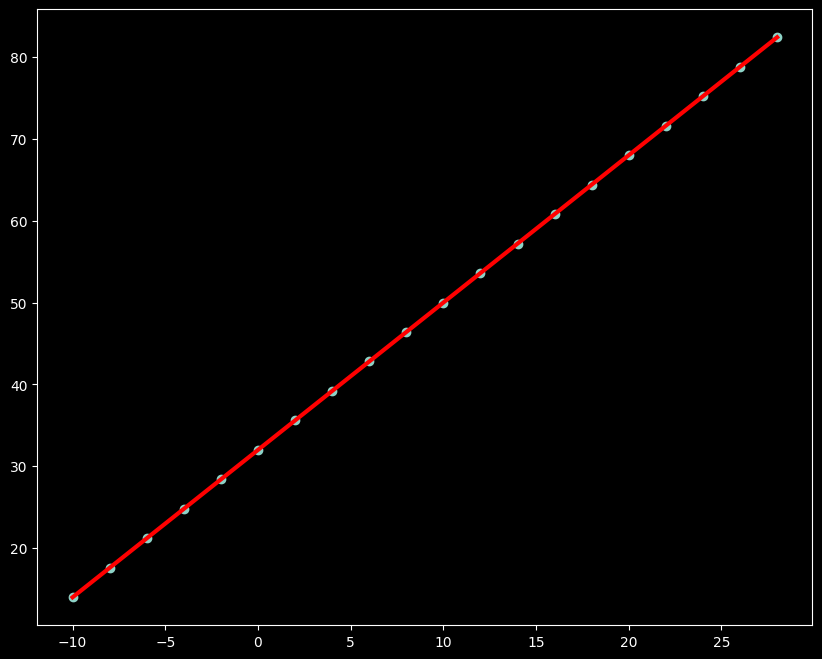

In [ ]:
plt.scatter(x, Y)
plt.plot(x, get_curva_linear(x, w, b), 'r', lw=3)